# Data Prioritization: Rule Based

## Importing Relevant Libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import re

## Reading in Data

In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/Ml_course/Project/Data/complaints_savings_account.csv', 
                   usecols=['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', ])
df_2.head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative
0,Checking or savings account,Checking account,Managing an account,Funds not handled or disbursed as instructed,The Claim No. assigned by Citibank : XXXX On X...
1,Checking or savings account,Checking account,Managing an account,Cashing a check,NaN
2,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,I logged into my account today and Td Bank che...
3,Checking or savings account,Checking account,Opening an account,Account opened as a result of fraud,"Hi, I received an email from Chime in XX/XX/20..."
4,Checking or savings account,Checking account,Managing an account,Funds not handled or disbursed as instructed,Truist Bank allowed fraudulent XXXX transactio...


In [ ]:
df_2.isnull().sum()

Product                             0
Sub-product                         0
Issue                               0
Sub-issue                           0
Consumer complaint narrative    85693
dtype: int64

In [ ]:
df_2.shape

(138070, 5)

In [ ]:
df_2.dropna(inplace=True)

In [ ]:
df_2.isnull().sum()

Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Consumer complaint narrative    0
dtype: int64

In [ ]:
df_2.shape

(52377, 5)

In [ ]:
df_2['Product'].value_counts()

Checking or savings account    52377
Name: Product, dtype: int64

In [ ]:
df_2.drop('Product', axis=1, inplace=True)

In [ ]:
df_2['Sub-product'].value_counts()

Checking account                    43344
Other banking product or service     4315
Savings account                      3963
CD (Certificate of Deposit)           721
None                                   34
Name: Sub-product, dtype: int64

In [ ]:
df_2['Issue'].value_counts()

Managing an account                                                                 28876
Closing an account                                                                   7605
Problem with a lender or other company charging your account                         6086
Opening an account                                                                   6019
Problem caused by your funds being low                                               3514
Incorrect information on your report                                                  135
Problem with a credit reporting company's investigation into an existing problem       41
Problem with fraud alerts or security freezes                                          36
Improper use of your report                                                            34
Credit monitoring or identity theft protection services                                22
Unable to get your credit report or credit score                                        8
Getting a 

In [ ]:
df_2['Sub-issue'].value_counts()

Deposits and withdrawals                                                                 8774
Problem using a debit or ATM card                                                        5276
Transaction was not authorized                                                           4818
Funds not handled or disbursed as instructed                                             3498
Banking errors                                                                           3375
Company closed your account                                                              2965
Problem accessing account                                                                2945
Funds not received from closed account                                                   2369
Fee problem                                                                              2241
Didn't receive terms that were advertised                                                2181
Overdrafts and overdraft fees                               

In [ ]:
len(df_2['Sub-issue'].value_counts())

50

## Checking Issues and Sub-Issues

In [ ]:
pd.DataFrame(df_2.groupby('Issue')['Sub-issue'].value_counts())

Sub-issue
Issue                                              Sub-issue                                                    
Closing an account                                 Company closed your account                              2965
                                                   Funds not received from closed account                   2369
                                                   Can't close your account                                 1848
                                                   Fees charged for closing account                          423
Credit monitoring or identity theft protection ... Billing dispute for services                                8
                                                   Problem canceling credit monitoring or identify...          6
                                                   Didn't receive services that were advertised                3
                                                   Problem with product or service terms changing              3
                                                   Received unwanted marketing or advertising                  2
Getting a line of credit                           None                                                        1
Improper use of your report                        Reporting company used your report improperly              19
                                                   Credit inquiries on your report that you don't ...         11
                                                   Received unsolicited financial product or insur...          3
                                                   Report provided to employer without your writte...          1
Incorrect information on your report               Information belongs to someone else                        49
                                                   Account status incorrect                                   45
                                                   Account information incorrect                              24
                                                   Public record information inaccurate                        6
                                                   Old information reappears or never goes away                5
                                                   Personal information incorrect                              5
                                                   Information is missing that should be on the re...          1
Managing an account                                Deposits and withdrawals                                 8774
                                                   Problem using a debit or ATM card                        5276
                                                   Funds not handled or disbursed as instructed             3498
                                                   Banking errors                                           3375
                                                   Problem accessing account                                2945
                                                   Fee problem                                              2241
                                                   Problem making or receiving payments                     1859
                                                   Cashing a check                                           743
                                                   Deposits or withdrawals                                   105
                                                   Problem with fees or penalties                             31
                                                   Problem with renewal                                       29
Opening an account                                 Didn't receive terms that were advertised                2181
                                                   Account opened as a result of fraud                      1887
                                   

In [ ]:
df_2.reset_index(drop=True, inplace=True)

In [ ]:
df_2['Consumer complaint narrative'].loc[df_2['Sub-issue']=='Problem with fees or penalties'][:1]

1103    I believe the letter ( copied and pasted below...
Name: Consumer complaint narrative, dtype: object

In [ ]:
df_2['Consumer complaint narrative'].iloc[1103]

'I believe the letter ( copied and pasted below ) sent to the CEO  of the Bank of Albuquerque will provide all necessary details. The Bank could never produce any disclosure but insists they were provided. Please contact me in the event you need additional details. I have attempted to resolve this with the bank all the way up to the CEO and was unable to resolve. I offered to open a 18 month CD with a balance of {$30000.00} in return for a waiver of the non-disclosed fee but yet they still refused. \n\nXXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX, Idaho XXXX XXXX XX/XX/XXXX XXXX XXXX XXXX and XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXXXXXX  XXXX XXXX XXXX XXXX, New Mexico XXXX I am writing this letter to request your assistance with an issue I have been attempting to resolve with the Bank of Albuquerque. This process began XX/XX/XXXX. \nIn XXXX I re-located my family to XXXX XXXX after I took a position as the XXXX XXXX XXXX  in XXXX, New Mexico. On XX/XX/XXXX I open a traditional Individu

In [ ]:
df_2.loc[df_2['Sub-issue']=='Overdrafts and overdraft fees']

,Sub-product,Issue,Sub-issue,Consumer complaint narrative
16,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,On XX/XX/XXXX a charge from XXXX was to come o...
41,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,Ok so I had about 46 dolllars in my checking a...
95,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,I had a checking account with Citizens Bank an...
123,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,"On Friday, XX/XX/2022 : my account had several..."
138,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,I over drafted my account but made a deposit o...
...,...,...,...,...
52271,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,-XX/XX/XXXX : was supposed to get a refund of ...
52282,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,While Out of town I was using my Debt / Credit...
52314,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,I have a linked savings and checking accounts ...
52355,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,This all started on XX/XX/XXXX I woke up and m...


In [ ]:
df_2['Consumer complaint narrative'].iloc[138]

"I over drafted my account but made a deposit of to bring the account back to date the very next day. I made a deposits of {$1200.00} plus more from XXXX thru XXXX. In those deposits {$400.00} was taken in overdraft fees, and my account is still overdrawn because of this. I have contacted your bank multiple times asking to just reject transactions when I don't have the funds instead of letting them go through. I have gone through the process of taking overdraft protection off my account in you're still taking these fees. These fees are predatory, your institution knows that there's n funds in the account and is letting them go through to be able to charge these fees. It is absolutely ridiculous that during a recession, and covid times you're taking advantage of your consumers. From 2020 until today, this bank has charged me over {$900.00} in overdraft fees. If this is not rectified I plan on taking legal action."

In [ ]:
misc_issues = ['Getting a line of credit', 
               'Received unsolicited financial product or insurance offers after opting out', 
               'Report provided to employer without your written authorization', 
               'Public record information inaccurate', 
               'Old information reappears or never goes away', 
               'Personal information incorrect', 
               'Information is missing that should be on the report', 
               'Deposits or withdrawals',
               'Problem with fees or penalties', 
               'Problem with renewal', 
               'Late or other fees', 
               'Their investigation did not fix an error on your report', 
               'Problem with personal statement of dispute', 
               'Difficulty submitting a dispute or getting information about a dispute over the phone', 
               'Was not notified of investigation status or results', 
               'Investigation took more than 30 days',  
               'Other problem getting your report or credit score', 
               'Problem getting your free annual credit report', 
               'Received unwanted marketing or advertising']

In [ ]:
len(misc_issues)

19

In [ ]:
df_2.shape

(52377, 4)

In [ ]:
df = df_2.loc[~df_2['Sub-issue'].isin(misc_issues), :]

In [ ]:
df.shape

(51951, 4)

In [ ]:
df['Sub-issue'].value_counts().index.to_list()

['Deposits and withdrawals',
 'Problem using a debit or ATM card',
 'Transaction was not authorized',
 'Funds not handled or disbursed as instructed',
 'Banking errors',
 'Company closed your account',
 'Problem accessing account',
 'Funds not received from closed account',
 'Fee problem',
 "Didn't receive terms that were advertised",
 'Overdrafts and overdraft fees',
 'Account opened as a result of fraud',
 'Problem making or receiving payments',
 "Can't close your account",
 'Unable to open an account',
 'Non-sufficient funds and associated fees',
 'Money was taken from your account on the wrong day or for the wrong amount',
 'Cashing a check',
 "Can't stop withdrawals from your account",
 'Fees charged for closing account',
 'Confusing or missing disclosures',
 'Bounced checks or returned payments',
 'Information belongs to someone else',
 'Account status incorrect',
 'None',
 'Account information incorrect',
 'Reporting company used your report improperly',
 "Credit inquiries on yo

priotize(issue_label):

    if issue_label in high:

        return 'high'

    elif issue_label in medium:

        return 'medium'
        
    return 'low'

In [ ]:
high_priority_list = ['Funds not handled or disbursed as instructed', 
                      'Problem using a debit or ATM card', 
                      'Problem accessing account', 
                      'Problem making or receiving payments', 
                      'Account opened as a result of fraud', 
                      'Unable to open an account', 
                      'Transaction was not authorized', 
                      'Money was taken from your account on the wrong day or for the wrong amount']

In [ ]:
len(high_priority_list)

8

In [ ]:
medium_priortiy_list = ['Funds not received from closed account', 
                        'Company closed your account', 
                        'Reporting company used your report improperly', 
                        'Credit inquiries on your report that you don\'t recognize',
                        'Information belongs to someone else', 
                        'Account status incorrect', 
                        'Account information incorrect', 
                        'Deposits and withdrawals', 
                        'Banking errors', 
                        'Cashing a check', 
                        'Overdrafts and overdraft fees', 
                        'Can\'t stop withdrawals from your account']

In [ ]:
len(medium_priortiy_list)

12

In [ ]:
sub_issue_list = df['Sub-issue'].value_counts().index.to_list()

## Prioritization

In [ ]:
counter = 0
for issue in sub_issue_list:
    if issue in high_priority_list or issue in medium_priortiy_list:
        continue
    print(issue)
    counter += 1
print(counter)

Fee problem
Didn't receive terms that were advertised
Can't close your account
Non-sufficient funds and associated fees
Fees charged for closing account
Confusing or missing disclosures
Bounced checks or returned payments
None
Billing dispute for services
Problem canceling credit monitoring or identify theft protection service
Problem with product or service terms changing
Didn't receive services that were advertised
12


In [ ]:
def prioritize_complaint(issue_label):
    if issue_label in high_priority_list:
        return 'High'
    
    elif issue_label in medium_priortiy_list:
        return 'Medium'
    
    return 'Low'

In [ ]:
df.columns

Index(['Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative'], dtype='object')

In [ ]:
df.drop('Sub-product', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df['Priority'] = df['Sub-issue'].apply(prioritize_complaint)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,Issue,Sub-issue,Consumer complaint narrative,Priority
0,Managing an account,Funds not handled or disbursed as instructed,The Claim No. assigned by Citibank : XXXX On X...,High
1,Problem with a lender or other company chargin...,Transaction was not authorized,I logged into my account today and Td Bank che...,High
2,Opening an account,Account opened as a result of fraud,"Hi, I received an email from Chime in XX/XX/20...",High
3,Managing an account,Funds not handled or disbursed as instructed,Truist Bank allowed fraudulent XXXX transactio...,High
4,Managing an account,Problem making or receiving payments,Making payment via XXXX and found out it was a...,High


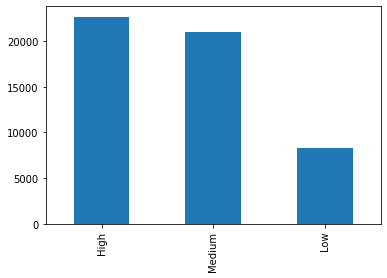

In [ ]:
df['Priority'].value_counts().plot(kind='bar')

In [ ]:
df.to_csv('/content/drive/MyDrive/Ml_course/Project/data_prioritized.csv', index=False)

In [ ]:
df['Sub-issue'].value_counts()

Deposits and withdrawals                                                      8774
Problem using a debit or ATM card                                             5276
Transaction was not authorized                                                4818
Funds not handled or disbursed as instructed                                  3498
Banking errors                                                                3375
Company closed your account                                                   2965
Problem accessing account                                                     2945
Funds not received from closed account                                        2369
Fee problem                                                                   2241
Didn't receive terms that were advertised                                     2181
Overdrafts and overdraft fees                                                 2114
Account opened as a result of fraud                                           1887
Prob

*********************************************